In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

## No scan skipping

### Standard

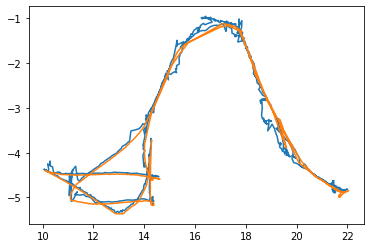

Mean: 0.100, Median: 0.067, Std: 0.093


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


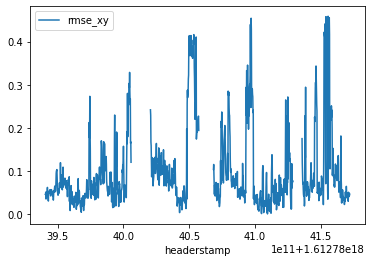

In [6]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_61.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_61.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Realsense

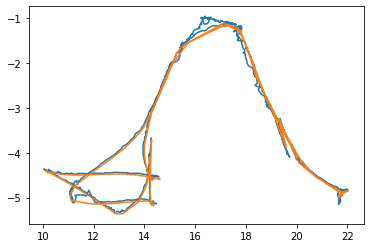

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mean: 0.070, Median: 0.058, Std: 0.047


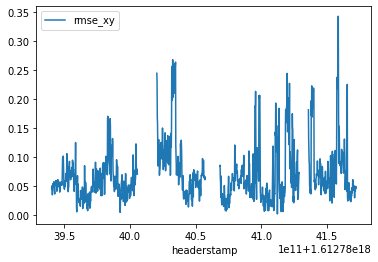

In [8]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_80.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_80.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### EKF

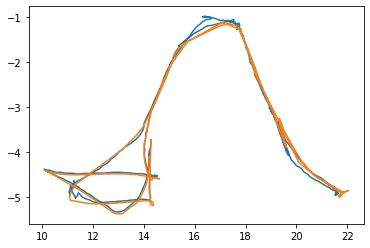

Mean: 0.119, Median: 0.094, Std: 0.087


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


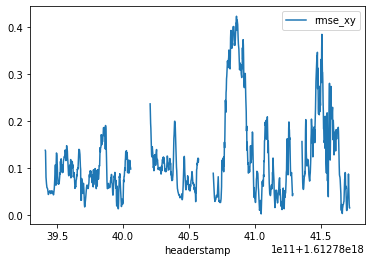

In [10]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_293.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_293.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Realsense (RT)

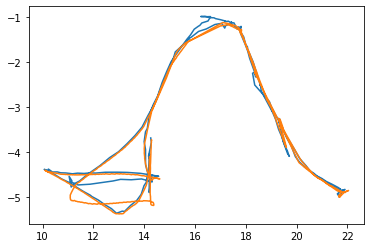

Mean: 0.085, Median: 0.060, Std: 0.100


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


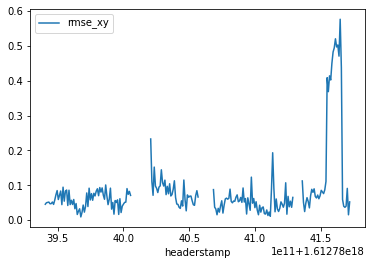

In [11]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_102.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_102.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### EKF (RT)

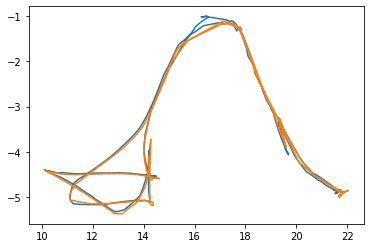

Mean: 0.100, Median: 0.087, Std: 0.061


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


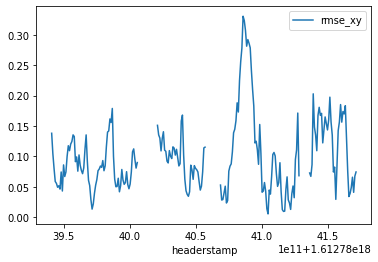

In [16]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_291.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_291.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Realsense (No Segmentation)

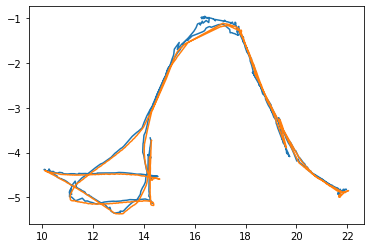

Mean: 0.069, Median: 0.065, Std: 0.033


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


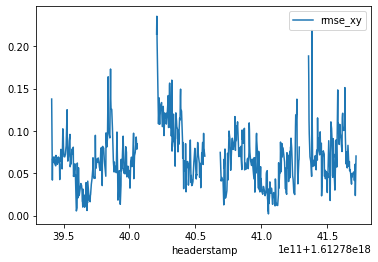

In [30]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_304.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_304.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### EKF (No Segmentation)

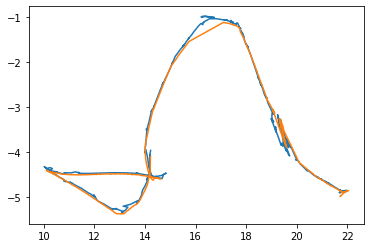

Mean: 0.085, Median: 0.071, Std: 0.056


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


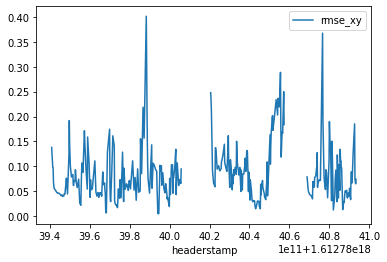

In [34]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_306.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_306.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### EKF (Smooth)

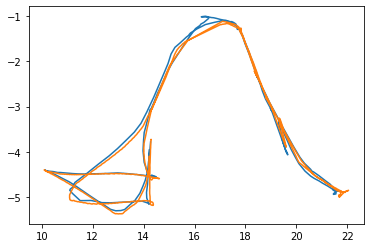

Mean: 0.107, Median: 0.096, Std: 0.062


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


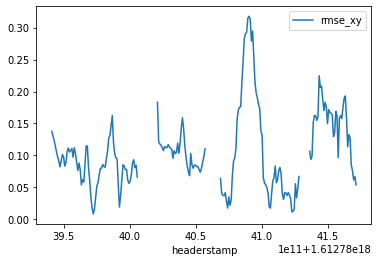

In [32]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_296.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_296.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Runs used for Pseudolabels

#### Full_dyn (with quick-fix of taking latest published transform)

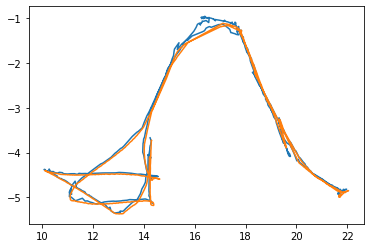

Mean: 0.068, Median: 0.063, Std: 0.035


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


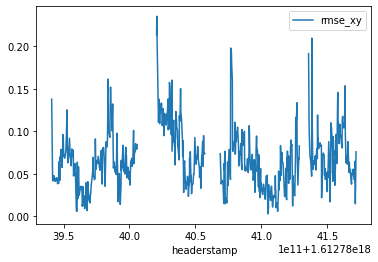

In [22]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_full_rumlang1_dyn_icp_17.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_full_rumlang1_dyn_leica_17.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

#### Full

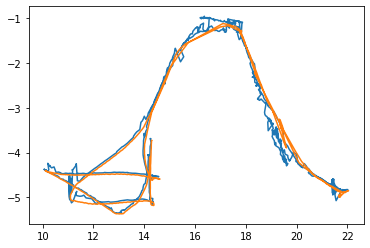

Mean: 0.118, Median: 0.082, Std: 0.096


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


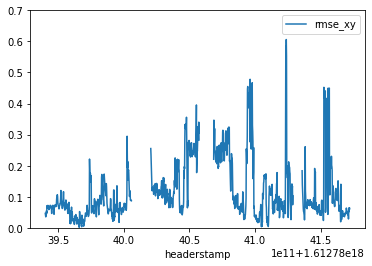

In [4]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_full_rumlang1_icp_2.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_full_rumlang1_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
ax = icp.plot('headerstamp', 'rmse_xy')
ax.set_ylim(0, 0.7)
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Realtime (dyn)

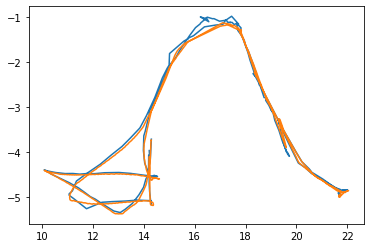

Mean: 0.070, Median: 0.064, Std: 0.037


/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


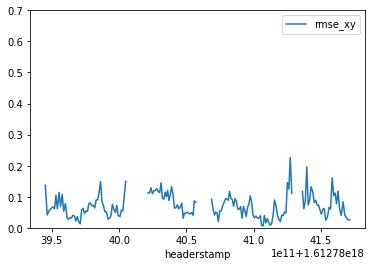

In [3]:
icp = pd.read_csv('~/data/rss_2021_data/pickelhaube_full_rumlang1_dyn_icp_24.csv')
leica = pd.read_csv('~/data/rss_2021_data/pickelhaube_full_rumlang1_dyn_leica_24.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
ax = icp.plot('headerstamp', 'rmse_xy')
ax.set_ylim(0, 0.7)
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))